In [1]:
import imageio as iio
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = iio.imread("bigMasoud.jpg")
print(img.shape, img.dtype)

(198, 186, 3) uint8


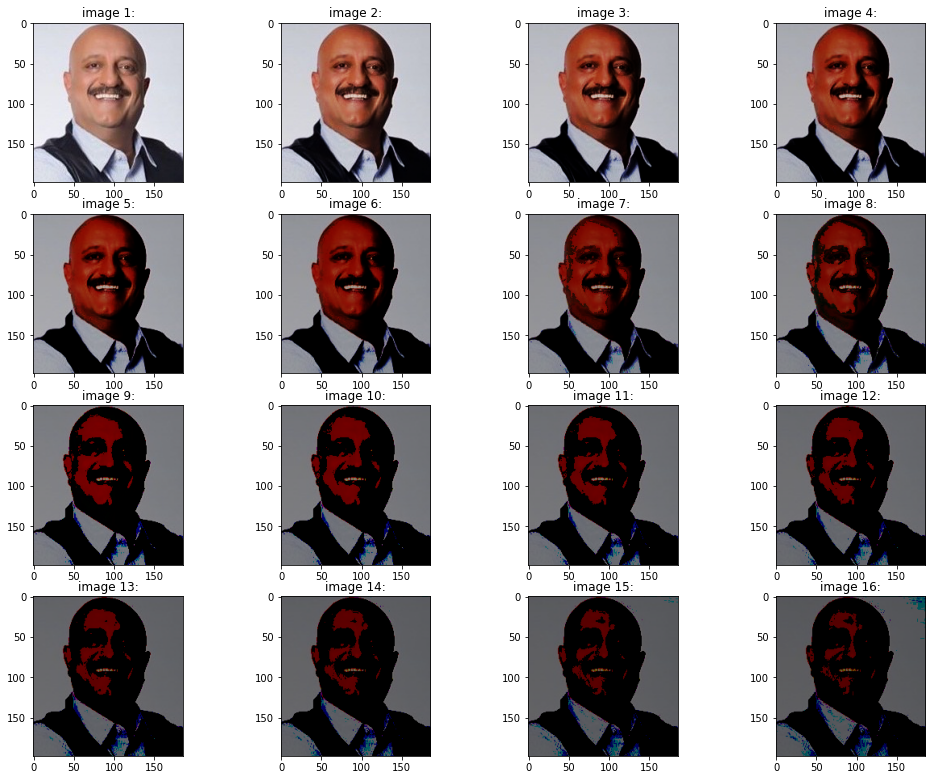

In [3]:
gama = [1,2 ,3,4, 6, 7.3,7.4, 7.5,8,9,10,11,12, 13,16,20]
plt.figure(figsize = (17, 17))
images = []
for i in range(len(gama)):
    maxdark = 180+2*i;
    dark = (img<maxdark).astype(int)
    dark = img*dark #less than maxdark
    light = img - dark #highlights of image
    darker = (dark**(gama[i])).astype(int) #to the power of gama to reduce brightness
    darker = abs((darker*maxdark/(np.amax(darker))).astype(int)) #normalize and handle -
    temp = darker + light #generate retouched image
    temp = (temp/(1+(i)/10)).astype(np.uint8) #make it even darker overall in each step
    plt.subplot(5,4,i+1)
    plt.imshow(temp)
    plt.title('image '+str(i+1)+':')
    images.append(temp.astype(np.uint8))
    iio.imwrite('bigMasouds/bigMasoud'+str(i+1)+'.png',temp.astype(np.uint8))
iio.mimsave('Traumatized_bigMasoud.gif', images, duration=0.25);

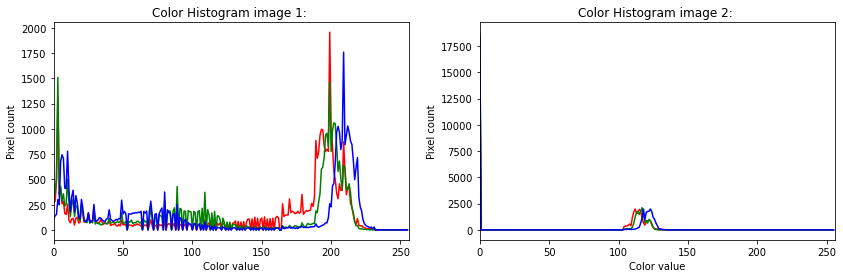

In [4]:
img1 = images[1]
img2 = images[9]

fig = plt.figure(figsize = (14, 4))
colors = ['red','green','blue']

temp = img1 #first image histogram
ax1 = plt.subplot(1,2,1)
plt.xlim([0, 256])
for i in range(3):
    histogram, bins = np.histogram(temp[:,:,i],bins=256,range=(0,256))
    plt.plot(bins[0:-1], histogram, color=colors[i])
plt.title("Color Histogram image 1: ")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

temp = img2 #second image histogram
ax2 = plt.subplot(1,2,2)
plt.xlim([0, 256])
for i in range(3):
    histogram, bins = np.histogram(temp[:,:,i],bins=256,range=(0,256))
    plt.plot(bins[0:-1], histogram, color=colors[i])
plt.title("Color Histogram image 2: ")
plt.xlabel("Color value")
plt.ylabel("Pixel count")

#save plt 
extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('Histogram_Img1.png', bbox_inches=extent.expanded(1.2, 1.3))

extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
plt.savefig('Histogram_Img2.png', bbox_inches=extent.expanded(1.3, 1.3))